### Test signal welch function with real vs. complex inputs


In [2]:
import os
import numpy as np
import sys; sys.path.insert(0, '..') # add parent folder path where lib folder is
from loading_functions import *
from scipy import signal
from scipy.fft import fftshift
from matplotlib import colors

In [224]:
# DroneDetect
main_folder = '/home/ltindall/data/DroneDetect/DroneDetect_V2/' # data path on mp-gpu-desktop06
sub_folders = os.listdir(main_folder)
fs = 60e6 #60 MHz

In [4]:
# loop through all files
# for sf in ['WIFI']: #, 'BLUE', 'BOTH', 'CLEAN']: # options: ['WIFI', 'BLUE', 'BOTH', 'CLEAN']
#     print('current folder: ', sf)

#     drone_folders = os.listdir(main_folder+sf+'/')
#     for df in drone_folders:
# #         print('     subfolder:', df)
#         # reset lists -  to save memory
#         DRONES = []
#         CONDS =[]
#         INTS = [] # interferences: 00 for a clean signal, 01 for Bluetooth only, 10 for Wi-Fi only and 11 for Bluetooth and Wi-Fi interference concurrently.

#         # features
#         F_PSD = []
#         F_PSD_freq = []

#         F_SPEC = []
#         F_SPEC_freq = []
#         F_SPEC_time = []

#         files = os.listdir(main_folder+sf+'/'+df+'/')
        

In [127]:
## Pick file to load
sf = 'CLEAN'
df = 'DIS_ON'
files = os.listdir(main_folder+sf+'/'+df+'/')

In [128]:
files

['DIS_0000_00.dat',
 'DIS_0000_04.dat',
 'DIS_0000_03.dat',
 'DIS_0000_01.dat',
 'DIS_0000_02.dat']

In [130]:
fi = files[1] # just for one file
t_seg = 20
d_single, _ = load_dronedetect_raw(main_folder+sf+'/'+df+'/'+fi, t_seg)

In [131]:
for fi in files:
    d_split, _ = load_dronedetect_raw(main_folder+sf+'/'+df+'/'+fi, t_seg)
    print(len(d_split))
    try:
        d_split_all = np.vstack((d_split_all, d_split))
    except:
        d_split_all = d_split

100
100
100
100
100


In [10]:
d_split_all.shape

(500, 1200000)

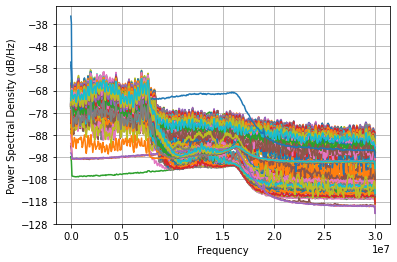

In [17]:
Psds = []
for i_plot in range(500):
#     fpsd, Pxx_den = signal.welch(d_split[i_plot], fs, window='hann', nperseg=1024, noverlap=120)
    Pxx_den, fpsd = plt.psd(d_split_all[i_plot],Fs=fs, noverlap=120, NFFT=1024, sides='onesided')
    Psds.append(Pxx_den)

In [18]:
mean_psd = np.mean(np.array(Psds), axis=0)

Text(0.5, 1.0, 'Using Complex Inputs')

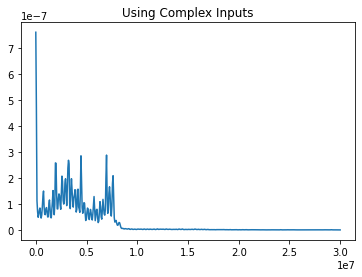

In [19]:
plt.plot(fpsd, mean_psd)
plt.title('Using Complex Inputs')

## Test Spectrogram & match paper

In [220]:
## Pick file to load
sf = 'CLEAN'
df = 'DIS_ON'
files = os.listdir(main_folder+sf+'/'+df+'/')

fi_number = 3
t_seg = 20

fi = files[fi_number] # just for one file
d_single, _ = load_dronedetect_raw(main_folder+sf+'/'+df+'/'+fi, t_seg)

segment_number = 19
d_complex = d_single[segment_number]

In [225]:
n_per_seg = 1024
noverlap = 120
win_type = 'hann'
fspec, t, Sxx = signal.spectrogram(d_complex, fs, window=win_type, nperseg=n_per_seg, noverlap =noverlap, 
                                   return_onesided=True,scaling='density') ## using minimal overlap
# F_SPEC.append(Sxx)
# F_SPEC_freq.append(fspec)
# F_SPEC_time.append(t)

/tmp/ipykernel_386507/518288855.py:3: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(t, fspec, Sxx, vmin=Sxx.min(), vmax=Sxx.max(),cmap ='viridis', alpha = 0.2)


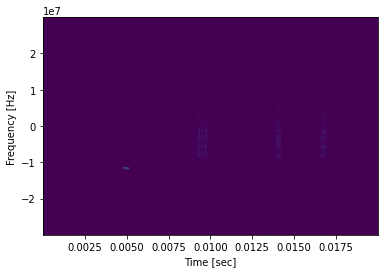

In [237]:
# plt.pcolormesh(t, fftshift(fspec), fftshift(Sxx, axes=0), shading='gouraud')
# nnorm = colors.Normalize(vmin=0, vmax=1, clip=False)
plt.pcolor(t, fspec, Sxx, vmin=Sxx.min(), vmax=Sxx.max(),cmap ='viridis', alpha = 0.2)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

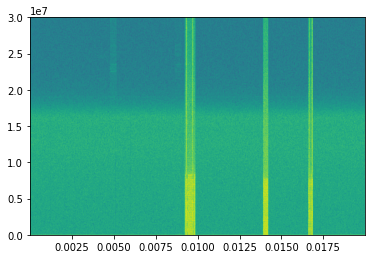

In [227]:
## MATPLOTLIB LIBRARY
han_window = np.hanning(1024)
# han_window = mlab.window_hanning(d_complex)
sp = plt.specgram(d_complex, NFFT=1024, Fs=fs, Fc=None, detrend=None, window=han_window, 
             noverlap=120, cmap=None, xextent=None, pad_to=None, sides='onesided', scale_by_freq=None, 
                  mode=None, scale=None, vmin=None, vmax=None)
plt.show()

In [251]:
sp

(array([[1.43407481e-09, 1.44523229e-09, 1.87568088e-09, ...,
         1.26283597e-09, 1.13639971e-09, 2.11597975e-09],
        [5.07054333e-10, 3.23473567e-10, 1.44599255e-09, ...,
         2.14535371e-10, 4.36882284e-10, 1.32275081e-09],
        [3.17435065e-11, 1.22431476e-10, 5.71740238e-11, ...,
         5.16847369e-11, 1.94485338e-10, 9.85975266e-11],
        ...,
        [2.07397821e-12, 7.19167432e-13, 1.41878728e-13, ...,
         1.48734376e-12, 2.67683597e-13, 2.71199624e-13],
        [2.00609146e-12, 3.19410408e-13, 3.31060076e-13, ...,
         6.05323768e-13, 4.49210188e-13, 1.66419374e-12],
        [1.41763925e-13, 3.43636917e-13, 1.21992802e-13, ...,
         2.21855402e-13, 4.86567965e-13, 4.91712213e-13]]),
 array([       0.  ,    58593.75,   117187.5 ,   175781.25,   234375.  ,
          292968.75,   351562.5 ,   410156.25,   468750.  ,   527343.75,
          585937.5 ,   644531.25,   703125.  ,   761718.75,   820312.5 ,
          878906.25,   937500.  ,   996093.75,

### Try interpolating the spectrogram
#### Input shape 224 x 224 x 3

In [241]:
sp[0].shape

(513, 1327)

In [249]:
from scipy import interpolate
x = np.linspace(0, 1, Sxx.shape[0])
y = np.linspace(0, 1, Sxx.shape[1])
f = interpolate.interp2d(y, x, Sxx, kind='cubic')

x2 = np.linspace(0, 1, 224)
y2 = np.linspace(0, 1, 224)
arr2 = f(y2, x2)

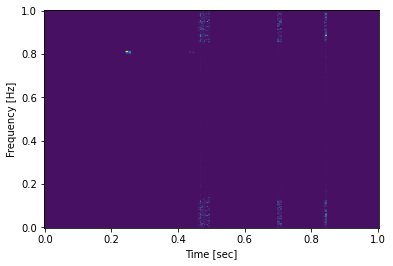

In [250]:
plt.pcolormesh(x2, y2, arr2, vmin=arr2.min(), vmax=arr2.max(),cmap ='viridis', alpha = 1)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

## Spectrogram example in documentation

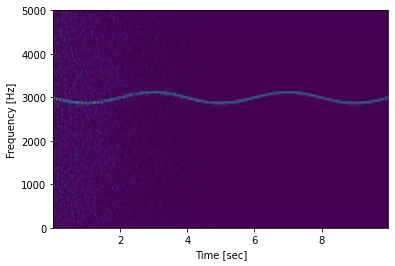

In [204]:
rng = np.random.default_rng()
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = rng.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [234]:
Sxx.shape

(1024, 1327)

### Visualize signal and understand relevance

In [16]:
len(d_single)
d_test = d_single[10]

In [15]:
from scipy.fft import fft

In [25]:
yi = fft(d_test.imag)
yr = fft(d_test.real)
y = fft(d_test)

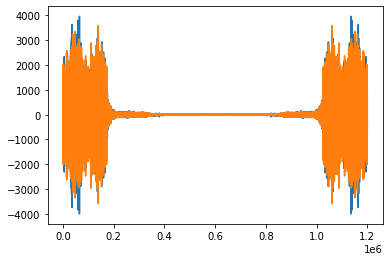

In [24]:
plt.plot(yr)
plt.plot(yi)

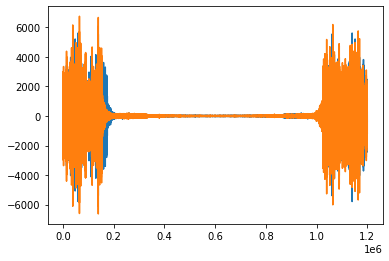

In [27]:
plt.plot(yi+yr)
plt.plot(y)

In [28]:
st = np.multiply(y, np.conj(y))

In [48]:
(len(st)-1)*fs/len(st)

59999950.0

In [58]:
freqs = range(0, int((len(st))*fs/len(st)), int(fs/len(st)))

In [59]:
len(freqs)

1200000

In [62]:
freqs[0]

0

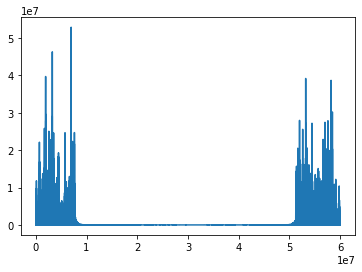

In [60]:
# plt.plot(abs(st))
plt.plot(freqs, st)
# magnitude is almost the same as st

In [31]:
ywelch = signal.welch(d_test, 're')

/home/kzhou/.pyenv/versions/3.8.2/envs/main/lib/python3.8/site-packages/scipy/signal/_spectral_py.py:1814: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


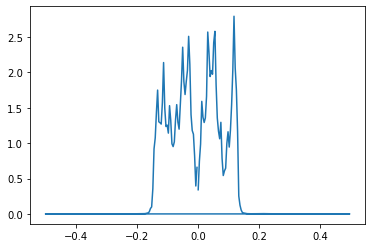

In [37]:
plt.plot(ywelch[0], ywelch[1])

In [35]:
ywelch[0]

array([ 0.        ,  0.00390625,  0.0078125 ,  0.01171875,  0.015625  ,
        0.01953125,  0.0234375 ,  0.02734375,  0.03125   ,  0.03515625,
        0.0390625 ,  0.04296875,  0.046875  ,  0.05078125,  0.0546875 ,
        0.05859375,  0.0625    ,  0.06640625,  0.0703125 ,  0.07421875,
        0.078125  ,  0.08203125,  0.0859375 ,  0.08984375,  0.09375   ,
        0.09765625,  0.1015625 ,  0.10546875,  0.109375  ,  0.11328125,
        0.1171875 ,  0.12109375,  0.125     ,  0.12890625,  0.1328125 ,
        0.13671875,  0.140625  ,  0.14453125,  0.1484375 ,  0.15234375,
        0.15625   ,  0.16015625,  0.1640625 ,  0.16796875,  0.171875  ,
        0.17578125,  0.1796875 ,  0.18359375,  0.1875    ,  0.19140625,
        0.1953125 ,  0.19921875,  0.203125  ,  0.20703125,  0.2109375 ,
        0.21484375,  0.21875   ,  0.22265625,  0.2265625 ,  0.23046875,
        0.234375  ,  0.23828125,  0.2421875 ,  0.24609375,  0.25      ,
        0.25390625,  0.2578125 ,  0.26171875,  0.265625  ,  0.26

In [38]:
y

array([-802.2793  -848.1885j ,  116.780785-638.05554j,
        725.607   -666.4011j , ...,  656.577   +311.2844j ,
        753.70557 -246.57982j, -538.959   +282.67792j], dtype=complex64)

### signal exploration

In [70]:
# import math

In [71]:
# create some test wave
fq = 100 # Hz
Ts = 1/fq
t = np.arange(0,100, Ts)

x1 = np.sin(2*math.pi*t)
x2 = np.sin(3*math.pi*t)

x_all = x1+x2

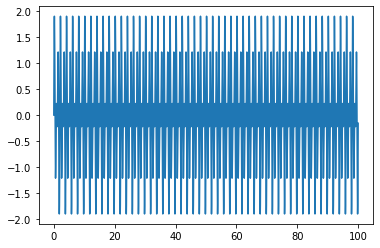

In [72]:
plt.plot(t, x_all)

In [73]:
y = fft(x_all)

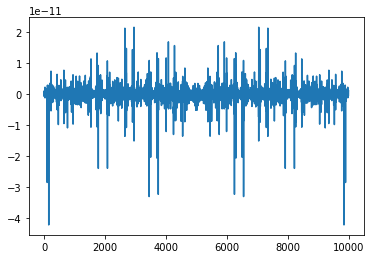

In [74]:
plt.plot(y)